In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
koreaETF = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/koreaETF_meta.csv")
globalETF = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/globalETF_meta.csv")
mixedETF = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/mixedETF_meta.csv")

In [55]:
koreaETF.columns = ['code', 'name', 'date', 'class', 'comp', 'return1year', 'baseIndex', 'error', 'nav', 'diff', 'vola', 'method', 'totalPayment', 'taxClass']
globalETF.columns = ['code', 'name', 'date', 'class', 'comp', 'return1year', 'baseIndex', 'error', 'nav', 'diff', 'vola', 'method', 'totalPayment', 'taxClass']
mixedETF.columns = ['code', 'name', 'date', 'class', 'comp', 'return1year', 'baseIndex', 'error', 'nav', 'diff', 'vola', 'method', 'totalPayment', 'taxClass']

총 872개 ETF 종목

In [56]:
koreaETF['country'] = 'korea'
globalETF['country'] = 'global'
mixedETF['country'] = 'mixed'

In [58]:
etf_table = pd.concat([koreaETF, globalETF, mixedETF], axis=0)
etf_table

,code,name,date,class,comp,return1year,baseIndex,error,nav,diff,vola,method,totalPayment,taxClass,country
0,466400,1Q 25-08 회사채(A+이상)액티브,2023.9.19,채권-회사채-단기,하나자산운용,0.00,KIS 2025-08만기형 크레딧 A+이상 지수(총수익),0.16,1.119240e+11,0.04,매우낮음,실물(액티브),0.10,배당소득세(보유기간과세),korea
1,451060,1Q K200액티브,2023.1.31,주식-시장대표,하나자산운용,14.84,코스피 200,0.71,1.545180e+11,-0.57,보통,실물(액티브),0.18,배당소득세(보유기간과세),korea
2,463290,1Q 단기금융채액티브,2023.8.3,채권-혼합-단기,하나자산운용,0.00,MK 머니마켓 지수(총수익),0.07,2.076750e+11,0.02,매우낮음,실물(액티브),0.08,배당소득세(보유기간과세),korea
3,479080,1Q 머니마켓액티브,2024.4.2,채권-혼합-단기,하나자산운용,0.00,KIS-하나 MMF 지수(총수익),0.05,3.344190e+11,0.01,매우낮음,실물(액티브),0.05,배당소득세(보유기간과세),korea
4,473440,ACE 11월만기자동연장회사채AA-이상액티브,2023.12.19,채권-회사채-단기,한국투자신탁운용,0.00,KIS 11월 만기자동연장회사채(AA-이상) 총수익지수,0.06,1.260100e+11,0.06,매우낮음,실물(액티브),0.05,배당소득세(보유기간과세),korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,449690,TIGER 한중반도체(합성),2022.12.22,주식-업종섹터-업종테마,미래에셋자산운용,19.13,KRX CSI 한·중 반도체지수,0.17,1.201640e+10,-1.11,보통,합성(패시브),0.35,배당소득세(보유기간과세),mixed
38,449680,TIGER 한중전기차(합성),2022.12.22,주식-업종섹터-업종테마,미래에셋자산운용,-26.30,KRX CSI 한·중 전기차지수,0.22,7.660630e+09,-0.42,높음,합성(패시브),0.35,배당소득세(보유기간과세),mixed
39,435530,히어로즈 TDF2030액티브,2022.6.30,혼합자산-주식+채권,키움투자자산운용,20.36,Dow Jones Target 2030 Index (Total Return),3.86,6.335931e+09,-0.17,매우낮음,실물(액티브),0.30,배당소득세(보유기간과세),mixed
40,435540,히어로즈 TDF2040액티브,2022.6.30,혼합자산-주식+채권,키움투자자산운용,25.61,Dow Jones Target 2040 Index (Total Return),3.75,6.744648e+09,-0.18,매우낮음,실물(액티브),0.34,배당소득세(보유기간과세),mixed


In [60]:
etf_table['type'] = etf_table['class'].str.split("-")
def splitType1(x):
    return list(x)[0]
def splitType2(x):
    if len(list(x)) > 2:
        return list(x)[1]
    else:
        return np.nan
def splitType3(x):
    if len(list(x)) == 3:
        return list(x)[2]
    else :
        return np.nan
etf_table['type1'] = etf_table['type'].apply(splitType1)
etf_table['type2'] = etf_table['type'].apply(splitType2)
etf_table['type3'] = etf_table['type'].apply(splitType3)

In [62]:
etf_table.drop(columns=['type'], axis=1, inplace=True)

In [63]:
etf_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 0 to 41
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          872 non-null    int64  
 1   name          872 non-null    object 
 2   date          872 non-null    object 
 3   class         872 non-null    object 
 4   comp          872 non-null    object 
 5   return1year   872 non-null    float64
 6   baseIndex     872 non-null    object 
 7   error         872 non-null    float64
 8   nav           872 non-null    float64
 9   diff          872 non-null    float64
 10  vola          872 non-null    object 
 11  method        872 non-null    object 
 12  totalPayment  872 non-null    float64
 13  taxClass      872 non-null    object 
 14  country       872 non-null    object 
 15  type1         872 non-null    object 
 16  type2         563 non-null    object 
 17  type3         563 non-null    object 
dtypes: float64(5), int64(1), object(12)


In [64]:
etf_table.groupby(['type1'])['name'].count().to_frame().reset_index()

,type1,name
0,기타,26
1,부동산,13
2,원자재,19
3,주식,618
4,채권,144
5,통화,12
6,혼합자산,40


In [65]:
etf_table.groupby(['country', 'type1'])['name'].count().to_frame().reset_index().sort_values(by='type1')

,country,type1,name
0,global,기타,11
6,korea,기타,12
13,mixed,기타,3
1,global,부동산,8
7,korea,부동산,5
2,global,원자재,18
8,korea,원자재,1
3,global,주식,244
9,korea,주식,356
14,mixed,주식,18


주식형 ETF 고려

In [66]:
etf_table = etf_table.sort_values(by='nav', ascending=False)

In [145]:
totalNav = int(etf_table['nav'].sum())
etf_table['navPer'] = etf_table['nav']/totalNav * 100
etf_table['cumsum_navPer'] = etf_table['navPer'].cumsum()
etfTop80s = etf_table[etf_table['cumsum_navPer'] < 80].head(80)['code'].tolist()

# netBuying of Personal Investor

In [69]:
net2018 = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/netBuying_2018.csv")
net2019 = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/netBuying_2019.csv")
net2020 = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/netBuying_2020.csv")
net2021 = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/netBuying_2021.csv")
net2022 = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/netBuying_2022.csv")
net2023 = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/netBuying_2023.csv")
net2024 = pd.read_csv("/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/data/netBuying_2024.csv")

In [77]:
net = pd.concat([net2018, net2019, net2020, net2021, net2022, net2023, net2024], axis=0, ignore_index=True)
net = net.sort_values(by='일자')
net = net.reset_index(drop=True)
net

,일자,금융투자,보험,투신,사모,은행,기타금융,연기금 등,기타법인,개인,외국인,기타외국인,전체
0,2018.1.10,1.036090e+11,2.280089e+10,-2.432010e+11,18467377575,4.042077e+10,3266291165,1.055691e+10,2.207938e+09,-6.438656e+09,4.838834e+10,-77702935,0
1,2018.1.11,-6.378665e+10,2.372107e+10,1.284687e+09,-3433796825,2.749480e+10,119824465,1.698425e+10,-1.826310e+09,-1.158354e+10,9.685503e+09,1340166155,0
2,2018.1.12,-6.330211e+10,2.076187e+09,2.602997e+10,969589350,-9.038713e+10,-274660560,-1.312635e+09,4.816148e+08,8.264362e+09,1.181220e+11,-667222390,0
3,2018.1.15,-3.924399e+10,2.214810e+09,-1.503470e+11,-92884875,4.390712e+09,278790000,-1.748418e+09,6.046173e+09,4.244497e+10,1.362280e+11,-170275695,0
4,2018.1.16,-2.149190e+11,-2.529285e+08,8.481479e+10,-12471431320,1.478700e+11,-6213653155,7.374661e+08,5.899298e+09,-2.301298e+10,1.753703e+10,11901425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,2024.7.3,-1.791080e+11,-5.504320e+09,1.562400e+11,8064495501,2.906312e+10,-524748420,-3.874040e+10,6.286288e+09,-2.522561e+10,4.960217e+10,-153476314,0
1609,2024.7.4,5.132953e+10,-1.381395e+10,-1.842670e+11,-9206991239,-2.247782e+10,-115874010,2.096094e+10,2.058960e+10,1.360680e+11,2.305960e+08,702680506,0
1610,2024.7.5,2.177200e+11,-2.095830e+10,-9.711513e+10,-25414956399,-9.982807e+10,-5621157440,-3.067956e+10,-1.820257e+10,7.640858e+10,2.618306e+09,1072997279,0
1611,2024.7.8,-7.282771e+10,-3.129527e+09,2.306557e+10,23083415190,-3.943196e+10,193149495,1.430894e+10,-3.179562e+10,8.845847e+10,-2.531997e+09,607279347,0


In [78]:
netPerson = net.melt(id_vars='일자', value_vars=['개인'], var_name='type', value_name='value')
netPerson

,일자,type,value
0,2018.1.10,개인,-6.438656e+09
1,2018.1.11,개인,-1.158354e+10
2,2018.1.12,개인,8.264362e+09
3,2018.1.15,개인,4.244497e+10
4,2018.1.16,개인,-2.301298e+10
...,...,...,...
1608,2024.7.3,개인,-2.522561e+10
1609,2024.7.4,개인,1.360680e+11
1610,2024.7.5,개인,7.640858e+10
1611,2024.7.8,개인,8.845847e+10


In [81]:
import datetime as dt 
netPerson['date'] = pd.to_datetime(netPerson['일자'])
netPerson['year'] = netPerson['date'].dt.year 
netPerson['month'] = netPerson['date'].dt.month

In [96]:
netPerson['누적순매수'] = netPerson['value'].cumsum()
netPerson

,일자,type,value,date,year,month,누적순매수
0,2018.1.10,개인,-6.438656e+09,2018-01-10,2018,1,-6.438656e+09
1,2018.1.11,개인,-1.158354e+10,2018-01-11,2018,1,-1.802220e+10
2,2018.1.12,개인,8.264362e+09,2018-01-12,2018,1,-9.757833e+09
3,2018.1.15,개인,4.244497e+10,2018-01-15,2018,1,3.268714e+10
4,2018.1.16,개인,-2.301298e+10,2018-01-16,2018,1,9.674159e+09
...,...,...,...,...,...,...,...
1608,2024.7.3,개인,-2.522561e+10,2024-07-03,2024,7,3.417560e+13
1609,2024.7.4,개인,1.360680e+11,2024-07-04,2024,7,3.431167e+13
1610,2024.7.5,개인,7.640858e+10,2024-07-05,2024,7,3.438808e+13
1611,2024.7.8,개인,8.845847e+10,2024-07-08,2024,7,3.447653e+13


In [83]:
ym_sum = netPerson.groupby(['year', 'month'])['value'].sum().to_frame().reset_index()

In [87]:
ym_sum['date'] = ym_sum['year'].astype(str) + "-" + ym_sum['month'].astype(str)

In [91]:
ym_sum['누적순매수'] = ym_sum['value'].cumsum()

In [152]:
ym_sum.to_excel("./data/personalCumSum.xlsx", index=False)

In [151]:
ym_sum

,year,month,value,date,누적순매수
0,2018,1,-5.102842e+10,2018-1,-5.102842e+10
1,2018,2,6.709578e+11,2018-2,6.199294e+11
2,2018,3,2.301435e+11,2018-3,8.500729e+11
3,2018,4,-1.637877e+11,2018-4,6.862852e+11
4,2018,5,1.033775e+11,2018-5,7.896626e+11
...,...,...,...,...,...
74,2024,3,1.481561e+12,2024-3,2.809648e+13
75,2024,4,1.627724e+12,2024-4,2.972420e+13
76,2024,5,1.933899e+12,2024-5,3.165810e+13
77,2024,6,1.536652e+12,2024-6,3.319475e+13


<Axes: xlabel='date', ylabel='누적순매수'>

/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/kimwoojin/Desktop/미래에셋대회준비/ETFModel/.venv/lib/python3.12/site-packages/IPython/core/eve

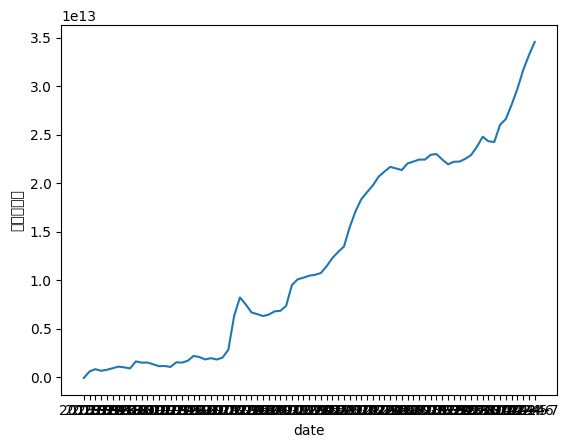

In [104]:
sns.lineplot(data=ym_sum, x='date', y='누적순매수')

# new Thing

In [120]:
from bs4 import BeautifulSoup

html_content = """
<tbody data-v-68864b0f=""><!----> <tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX CD금리액티브(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">459580</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">49.45 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03250-4209(22-11)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.62 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03250-5403(24-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.57 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(하나금융투자)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.21 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        재정2024-0210-0063<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.74 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 200</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">069500</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.69 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.21 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.29 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.23 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER CD금리투자KIS(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">357870</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">39.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        CD금리투자KIS TRS 19<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">21.75 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        CD금리투자KIS TRS 15<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">18.61 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        CD금리투자KIS TRS 20<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        CD금리투자KIS TRS 3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.34 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX KOFR금리액티브(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">423160</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">36.35 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(한국투자증권)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.04 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(NH투자증권)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.76 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(현대차증권)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.69 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(삼성증권)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.59 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국S&amp;P500</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">360750</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.95 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.94 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.11 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        AMAZON.COM INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.62 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ALPHABET INC-CL A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.24 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER KOFR금리액티브(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">449170</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">56.04 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        하나카드243-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">0.95 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        하나카드219-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">0.95 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리카드232-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">0.95 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리카드219-1(사)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">0.95 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국나스닥100</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">133690</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.98 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.43 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.43 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        AMAZON.COM INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.00 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BROADCOM INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.78 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 종합채권(AA-이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">273130</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03125-5209(22-9)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권01375-2912(19-8)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.17 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권01375-3006(20-4)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.60 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고02500-5203(22-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.39 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고01875-5103(21-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.36 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국필라델피아반도체나스닥</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">381180</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">12.41 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BROADCOM INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.31 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ADVANCED MICRO DEVICES<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.34 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        TAIWAN SEMICONDUCTOR-SP ADR<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.34 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        INTEL CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.29 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국테크TOP10 INDXX</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">381170</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">20.97 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">19.45 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">17.26 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ALPHABET INC-CL A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">13.41 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        AMAZON.COM INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.40 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 200</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">102110</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.65 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.21 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.78 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.29 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.23 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 200TR</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">278530</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.75 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.23 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.79 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.30 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.24 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 24-12 은행채(AA+이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">465680</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        산금23신이0101-1025-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.21 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국수출입금융2312다-할인-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.19 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리은행27-11-이표01-갑-07<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.44 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기업은행(신)2311할1A-03<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.86 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한은행27-12-할-1-A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.84 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 레버리지</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">122630</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <span data-v-68864b0f="" class="red_tag">
                          2X</span></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        2024-09 코스피200지수선물<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">101.55 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KODEX 200<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">22.05 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">19.60 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KODEX 200TR<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.29 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.70 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 200선물인버스2X</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">252670</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <span data-v-68864b0f="" class="blue_tag">
                          -2X</span></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">81.59 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KODEX 인버스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">18.40 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        2024-09 코스피200지수선물<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">-181.28 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">-</div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        2024-09 코스피200지수선물<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">-181.28 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">RISE 머니마켓액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">455890</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">18.24 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국서부발전 20240717-50-3(단)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.83 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한캐피탈 20240715-91-1(단)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.82 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        에이치씨디제십사차 20240503-91-1(단)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.48 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        JB 우리캐피탈467-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">1.72 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 차이나전기차SOLACTIVE</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">371460</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        CONTEMPORARY AMPEREX TECHN-A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">13.52 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BYD CO LTD -A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">13.38 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">12.49 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        LI AUTO INC - ADR<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.16 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        GLOBAL X CHINA ELECTRIC -HKD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.65 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 24-12 금융채(AA-이상)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">470260</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리카드222-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.27 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리금융캐피탈459-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.25 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대커머셜457<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.63 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한카드2186-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.58 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        케이비캐피탈490-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.44 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 미국S&amp;P500TR</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">379800</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.03 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.03 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA Corp<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.19 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Amazon.com Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.67 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ALPHABET INC-CL A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.26 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 1년은행양도성예금증서+액티브(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">481050</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(하나금융투자)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">26.04 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03250-4209(22-11)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">13.97 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        하나증권3776<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.76 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03250-5403(24-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리은행27-09-이표1.25-갑-08<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.42 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 단기채권PLUS</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">214980</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">27.60 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        부산은행2024-07이1A-03<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.89 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        하나금융지주60-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.48 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한은행28-03-이-1-C<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.45 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국수출입금융2406아-할인-273<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.69 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 미국30년국채액티브(H)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">453850</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ISHARES 20+ YEAR TREASURY BD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">25.72 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">22.64 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        T 4 1/4 02/15/54<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">14.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        DRX DLY 20+ YR TREAS BULL 3X<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">13.06 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        T 4 1/8 08/15/53<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.33 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 삼성그룹</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">102780</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">26.87 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성SDI<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">12.92 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성바이오로직스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.00 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성물산<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.22 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성화재<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.35 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER MSCI Korea TR</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">310970</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">32.25 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.02 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자우<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.34 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.75 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.51 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">RISE 종합채권(A-이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">385540</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-2903(24-1)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.88 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-5403(24-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.28 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국도로공사고속도로건설채권890<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.57 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        수산금융채권(은행)24-7이18-03<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.36 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-4209(22-11)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.31 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX Top5PlusTR</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">315930</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">26.78 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">23.18 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.62 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.22 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        셀트리온<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.53 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">RISE 200</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">148020</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.76 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.23 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.78 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.30 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.24 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 미국S&amp;P500</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">360200</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.02 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA Corp<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.18 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.71 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Amazon.com Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.66 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 2차전지산업</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">305720</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        LG에너지솔루션<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">12.42 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        POSCO홀딩스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">12.28 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성SDI<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.32 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        LG화학<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.16 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        에코프로비엠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.81 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER TOP10</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">292150</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">26.90 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">23.30 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.44 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.08 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        셀트리온<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.43 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 미국나스닥100TR</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">379810</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.89 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.35 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA Corp<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.35 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Amazon.com Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.95 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BROADCOM LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.72 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 2차전지테마</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">305540</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        LG에너지솔루션<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">15.16 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        POSCO홀딩스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">15.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성SDI<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">14.72 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        LG화학<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">14.12 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        포스코퓨처엠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.37 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국배당다우존스</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">458730</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HOME DEPOT INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.20 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        AMGEN INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.07 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        UNITED PARCEL SERVICE-CL B<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.99 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BLACKROCK INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.97 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ABBVIE INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.95 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER CD1년금리액티브(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">475630</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">44.72 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        농업금융채권(중앙회)2023-8이2Y-B<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.98 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        엔에이치농협캐피탈215-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.96 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        아이엠뱅크45-02이12A-05<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.93 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        산업금융채권23신이0106-0901-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.93 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 코스닥150레버리지</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">233740</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <span data-v-68864b0f="" class="red_tag">
                          2X</span></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        2024-09 코스닥150선물<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">95.52 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KODEX 코스닥150<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">27.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        알테오젠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.97 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HLB<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.42 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        에코프로<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.27 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 25-11 은행채(AA-이상)PLUS액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">476810</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        부산은행2024-05이1.5A-13<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.05 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        농업금융채권(은행) 2023-11이2Y-B<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.12 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        수산금융채권(은행)24-5이18-14<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.03 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리은행28-07-할인01-갑-18<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.81 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한은행27-11-이-2-A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.07 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER Fn반도체TOP10</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">396500</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">27.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">25.44 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한미반도체<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">17.83 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        리노공업<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.09 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        DB하이텍<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.19 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 미국나스닥100</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">367380</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.06 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA Corp<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Amazon.com Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.05 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BROADCOM LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.83 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 25-10 회사채(A+이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">453540</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한투자증권2212-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.06 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리카드222-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.04 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리금융캐피탈455-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국투자금융지주33<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.99 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK304-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.99 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">SOL 종합채권(AA-이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">436140</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03250-5403(24-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.16 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고02375-2703(22-1)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.74 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        2024-09 국채선물3(신)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.85 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권01375-3006(20-4)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.76 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성증권 20240508-92-4(단)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.51 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 코스닥150</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">229200</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        알테오젠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.28 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HLB<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.51 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        에코프로<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.32 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        에코프로비엠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.38 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        엔켐<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.02 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 종합채권(AA-이상)KIS액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">356540</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고02500-5203(22-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.95 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.21 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03250-5403(24-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.15 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고02375-2812(18-10)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.62 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03125-5209(22-9)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.11 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국배당+7%프리미엄다우존스</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">458760</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HOME DEPOT INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.09 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        AMGEN INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.98 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        UNITED PARCEL SERVICE-CL B<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.90 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BLACKROCK INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.88 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SCHWAB US DVD EQUITY ETF<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.85 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 24-10 회사채(A+이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">447820</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        경기주택도시공사22-11-50<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.82 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국전력공사채권1260<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.82 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        케이비국민카드370-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.81 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리카드221-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.80 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리금융캐피탈475-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.80 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 단기통안채</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">157450</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통화안정증권03680-2501-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">32.08 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통화안정증권04120-2410-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">32.08 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통화안정증권03280-2504-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">32.02 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.80 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.80 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 인버스</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">114800</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <span data-v-68864b0f="" class="blue_tag">
                          -1X</span></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">99.99 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        2024-09 코스피200지수선물<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">-100.58 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">-</div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">-</div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        2024-09 코스피200지수선물<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">-100.58 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 단기채권</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">153130</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">22.96 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통안04020-2510-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">14.97 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통안03680-2501-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.79 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고01375-2409(19-5)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.43 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고01875-2412(21-10)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.04 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 200 IT</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">139260</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">21.96 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">20.61 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성SDI<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">12.93 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        LG전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.44 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전기<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.71 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 종합채권(AA-이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">451540</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.60 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-5403(24-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03625-5309(23-7)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.04 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        토지주택채권119<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.55 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-3306(23-5)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.48 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KOSEF 200TR</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">294400</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.69 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.20 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.78 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.29 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.23 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ARIRANG 200</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">152100</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.73 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.18 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.79 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.30 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.24 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 단기채권액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">272580</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        산업금융채권24신이0103-0125-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.49 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한은행27-12-이-1-C<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.11 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        하나은행46-04이1.75갑-18<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.06 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국민은행4401이표일(01)11M-03<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.04 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국수출입금융2403아-할인-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.67 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 2차전지소재Fn</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">462010</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        에코프로<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">20.93 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        에코프로비엠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">20.19 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        포스코퓨처엠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">19.20 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        POSCO홀딩스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">15.55 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        LG화학<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.56 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국30년국채프리미엄액티브(H)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">476550</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ISHARES 20+ YEAR TREASURY BD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">25.11 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SPDR PORT LNG TRM TRSRY<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">20.05 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        PIMCO 25+ YR ZERO CPN US TIF<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">15.54 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        VANGUARD LONG-TERM TREASURY<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">15.04 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        VANGUARD EXTENDED DUR TREAS<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.12 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">RISE 단기통안채</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">196230</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">66.40 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통화안정증권03730-2411-01<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.23 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통화안정증권03670-2409-01<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.18 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통화안정증권04120-2410-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.17 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        통화안정증권04120-2410-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.17 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">RISE 미국나스닥100</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">368590</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.64 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.11 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.14 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NASDAQ 100 E-MINI INDEX SEPT 2024<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.90 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.82 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 미국반도체MV</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">390390</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA Corp<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">19.43 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        TAIWAN SEMICONDUCTOR-SP ADR<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">13.09 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BROADCOM LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.71 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ADVANCED MICRO DEVICES<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.12 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        INTEL Corp<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.92 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">SOL 미국배당다우존스</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">446720</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HOME_DEPOT<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.21 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        AMGEN<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.09 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        UNITED PARCEL SERVICE-CL B<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BLACKROCK INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.99 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ABBV<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.96 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국달러단기채권액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">329750</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        INDKOR 5 1/8 10/25/24<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.80 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KDB 2 1/8 10/01/24<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        INDKOR 2 1/8 10/23/24<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.75 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        EIBKOR 2 7/8 01/21/25<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.74 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MSFT 2.7 02/12/25<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.73 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 미국빅테크10(H)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">314250</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        TESLA MOTORS<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.73 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICRO NYSE FANG 2024 09<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.64 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.54 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.32 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Snowflake Inc   - CL A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.24 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 차이나항셍테크</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">371160</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MEITUAN-CLASS B<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.68 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ALIBABA GROUP HOLDING LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.26 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        TENCENT HOLDINGS LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.14 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        XIAOMI CORP-CLASS B<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.80 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        JD.COM INC-CLASS A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.52 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 자동차</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">091180</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">26.34 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">23.99 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대모비스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">17.63 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국타이어앤테크놀로지<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.43 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HL만도<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.66 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 반도체</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">091160</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">27.58 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">18.70 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한미반도체<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.83 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        리노공업<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.71 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HPSP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.83 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">RISE CD금리액티브(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">477080</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(메리츠증권)_240716<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">43.13 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(키움증권)_240328<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">29.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(신한투자증권)_240418<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">15.22 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.56 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        스왑(미래에셋증권)_44G4_240325<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">0.57 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 인도Nifty50</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">453810</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HDFC Bank Ltd<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.96 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Reliance Industries Ltd<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.58 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ICICI Bank Ltd<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.84 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Infosys Ltd<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.60 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ITC Ltd<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.86 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 인도니프티50</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">453870</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HDFC BANK LIMITED<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        RELIANCE INDUSTRIES LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.63 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ICICI BANK LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.86 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        INFOSYS LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.56 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        LARSEN &amp; TOUBRO LTD<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.88 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 리츠부동산인프라</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">329200</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        맥쿼리인프라<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">15.78 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK리츠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">14.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ESR켄달스퀘어리츠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.06 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        롯데리츠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.24 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        제이알글로벌리츠<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.35 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 200</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">105190</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.58 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.18 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.29 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.22 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">HANARO 200</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">293180</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.62 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.18 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.29 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.23 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX MSCI Korea TR</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">278540</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">32.27 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.02 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자우<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.34 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.75 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.51 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 글로벌반도체TOP4 Plus SOLACTIVE</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">446770</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">24.65 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        TAIWAN SEMICONDUCTOR-SP ADR<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">22.00 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ASML HOLDING NV-NY REG SHS<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">17.52 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">16.48 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        TEXAS INSTRUMENTS INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.62 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">SOL 초단기채권액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">469830</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        지에스리테일32-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.44 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        메리츠캐피탈208-2(지)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.31 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신세계센트럴시티7<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.30 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차증권 20240708-92-10(단)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.25 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        디알제구차 20240619-30-2(단)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.18 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국30년국채스트립액티브(합성 H)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">458250</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        STPL Index TRS 230622-03<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">33.01 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        STPL Index TRS 240517-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">23.05 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SP 0 11/15/53<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">20.07 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        STPL Index TRS 231228-02<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.38 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        PIMCO 25+ YR ZERO CPN US TIF<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.18 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">RISE 미국S&amp;P500</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">379780</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.62 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.62 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.82 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        S&amp;P500 EMINI FUT SEPT 2024<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.79 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.75 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 미국빅테크TOP7 Plus</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">465580</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA Corp<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">17.48 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">17.33 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ALPHABET INC-CL A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">15.37 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">13.54 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Amazon.com Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">13.34 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ARIRANG 머니마켓액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">477050</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        케이에스에스제일차 20240605-90-1(단)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        비아이티리치제이차 20240423-91-1(단)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.39 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신보2022제22차유동화전문1-1(사)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.30 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        하나캐피탈375-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.30 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        한국전력공사채권1266<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.30 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ARIRANG 고배당주</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">161510</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리금융지주<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.25 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기업은행<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.09 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대해상<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.96 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK텔레콤<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.93 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성증권<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.83 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국테크TOP10+10%프리미엄</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">474220</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">21.33 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">18.65 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">18.18 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ALPHABET INC-CL A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">12.55 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        AMAZON.COM INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.13 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KOSEF 국고채10년</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">148070</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권04250-3212(22-14)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.12 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권04125-3312(23-11)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.08 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-3306(23-5)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">29.02 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.76 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.76 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">RISE KIS국고채30년Enhanced</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">385560</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-5403(24-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">103.75 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03625-5309(23-7)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">11.44 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-5303(23-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">10.67 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">-25.88 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">-25.88 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국달러SOFR금리액티브(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">456610</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Solactive SOFR TRS 2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">95.93 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Solactive SOFR Index TRS 231130-04<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">1.46 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        Solactive SOFR TRS 1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">1.46 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        [USD] 예금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">1.13 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        [USD] 예금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">1.13 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 선진국MSCI World</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">251350</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.81 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MSCI World Index Futures202409<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.04 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        APPLE Inc<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.57 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        MICROSOFT<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.26 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA Corp<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.02 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KOSEF 200</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">069660</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        삼성전자<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">31.77 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        SK하이닉스<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">9.23 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대차<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.79 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        기아<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.30 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        KB금융<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.24 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 미국배당다우존스</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">402970</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        HOME DEPOT INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.24 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        AMGEN INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.13 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        UNITED PARCEL SERVICE-CL B<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.06 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        BLACKROCK INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.05 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        ABBVIE INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.00 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ARIRANG 종합채권(AA-이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">451000</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-5403(24-2)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">14.19 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        농업금융채권(은행)2024-06이3Y-A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.31 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.29 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03500-3406(24-5)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.26 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고채권03250-4209(22-11)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">2.90 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 25-11 회사채(A+이상)액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">467940</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        케이비국민카드391-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.42 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한캐피탈488-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.39 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        우리카드235-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.37 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대백화점30-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.34 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.43 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">KODEX 국고채3년</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">114260</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03875-2612(23-10)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">30.85 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03250-2903(24-1)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">30.74 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        국고03125-2606(23-4)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">30.29 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.10 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.10 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">히어로즈 머니마켓액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">476450</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대캐피탈1976-7(녹)<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.76 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        신한 자금부 20240613-364-1<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">5.42 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        케이비국민카드283-3<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        현대카드867-2<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        하나캐피탈353-5<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.49 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">ACE 테슬라밸류체인액티브</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">457480</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        DIREXION DAILY TSLA BULL 2X<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">20.26 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        TESLA INC<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">19.84 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        T-REX 2X LNG TESLA DLY TRGT<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">7.26 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        NVIDIA CORP<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">4.92 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        CONTEMPORARY AMPEREX TECHN-A<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">3.99 %</span></div> <!----></td></tr><tr data-v-68864b0f=""><!----> <td data-v-68864b0f="" class="t_ellipsis sticky-cell txt_left K-ETF v2 short"><b data-v-68864b0f="">TIGER 미국나스닥100커버드콜(합성)</b><br data-v-68864b0f=""> <div data-v-68864b0f="" class="layout row wrap"><span data-v-68864b0f="" class="text_s">441680</span> <!----> <!----> <div data-v-68864b0f="" class="spacer"></div> <!----></div></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        나스닥100커버드콜 TRS 240605-01<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">29.05 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        나스닥100커버드콜 TRS 240425-03<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">26.37 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        나스닥100커버드콜 TRS 240523-03<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">14.50 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        원화현금<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">8.42 %</span></div> <!----></td><td data-v-68864b0f="" class="txt_left"><!----> <!----> <!----> <!----> <div data-v-68864b0f="" class="tbl_font13">
                        GLOBAL X NASD 100 COV CALL<br data-v-68864b0f=""> <span data-v-68864b0f="" class="text_s">6.68 %</span></div> <!----></td></tr></tbody>
"""

In [121]:
soup = BeautifulSoup(html_content, 'lxml')


In [134]:

# Parse the HTML
soup = BeautifulSoup(html_content, 'lxml')

# Define a list to store the data
data = []

# Function to extract text, handling line breaks and extra spaces
def extract_text(cell):
    b_tag = cell.find('b')
    span_tag = cell.find('span')
    div_tag = cell.find('div')
    
    # Extract text from div, handling line breaks and extra spaces
    if div_tag:
        text = div_tag.get_text(separator=' ', strip=True)
    else:
        text = cell.get_text(separator=' ', strip=True)
    
    # Separate text into lines or parts
    lines = text.split(' ')
    
    # Extract main text and percentage
    main_text = ' '.join([line for line in lines if not line.replace('%', '').replace('.', '').isdigit()]).strip()

    percentage = next((line.replace(' %', '') for line in lines if line.replace('%', '').replace('.', '').isdigit()), '')
    
    return main_text, percentage

# Iterate over each row in the HTML table
for row in soup.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 6:
        code = cells[0].find('span').text.strip()
        
        top1, top1_per = extract_text(cells[1])
        top2, top2_per = extract_text(cells[2])
        top3, top3_per = extract_text(cells[3])
        top4, top4_per = extract_text(cells[4])
        top5, top5_per = extract_text(cells[5])

        # Append to data list
        data.append([code, top1, top1_per, top2, top2_per, top3, top3_per, top4, top4_per, top5, top5_per])

# Create a DataFrame
df = pd.DataFrame(data, columns=['code', 'top1', 'top1per', 'top2', 'top2per', 'top3', 'top3per', 'top4', 'top4per', 'top5', 'top5per'])



In [138]:
df['top1'] = df['top1'].str.replace(" %", "")
df['top2'] = df['top2'].str.replace(" %", "")
df['top3'] = df['top3'].str.replace(" %", "")
df['top4'] = df['top4'].str.replace(" %", "")
df['top5'] = df['top5'].str.replace(" %", "")

In [140]:
df.to_csv("./data/top90ETFBase.csv", index=False)

In [142]:
df['code'] = df['code'].astype(int)

In [147]:
set(df['code'].tolist()) - set(etfTop80s)

{69660, 114260, 251350, 402970, 441680, 451000, 456610, 457480, 467940, 476450}